In [16]:
import numpy as np
import cv2
import urllib.request
from matplotlib import pyplot as plt
from scipy.spatial import distance

In [8]:
# Donwload an image from the web
url = "https://frostlor-cdn-prod.courses.csuglobal.edu/lor/resources/src/272137f2-3816-3779-a73f-71882da43fa1/shutterstock227361781--125.jpg"
urllib.request.urlretrieve(url, "counterfeit.jpg")

img = cv2.imread('counterfeit.jpg')
img.shape


(83, 125, 3)

In [10]:
img.size

31125

In [9]:
height, width, channels = img.shape


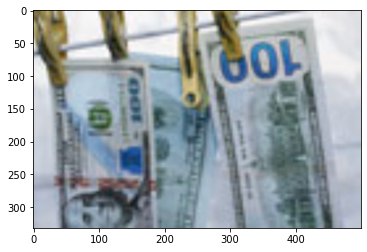

In [12]:
# Make it easier for my eyes to read
bigger_img = cv2.resize(img, (width*4, height*4))
plt.imshow(bigger_img)

In [15]:
cv2.imwrite('counterfeit_bigger.jpg', bigger_img)
bigger_img.shape

(332, 500, 3)

In [ ]:
# Using an online tool, pick some corners to deskew


![Choose points](Pick_points.png)

In [39]:
# Let's deskew
a = [251.0,36.0]
b = [427.0,12.0]
c = [309.0,330.0]
d = [475.0,306.0]

# # I put them in the wrong order, so reverse them
# a.reverse()
# b.reverse()
# c.reverse()
# d.reverse()

pts_src = np.array([a,b,c,d])

# Create a new black image with the dimensions of the bounded points
new_width = int(distance.euclidean(a,b))
new_height = int(distance.euclidean(b,c))

pts_dst = np.array([[0,0],[new_width,0],[0,new_height],[new_width,new_height]])
new_width, new_height

(177, 339)

In [40]:
m = cv2.getPerspectiveTransform(np.float32(pts_src), np.float32(pts_dst))
out = cv2.warpPerspective(bigger_img, m, (new_width, new_height))
cv2.imwrite("deskew.jpg", out)

True

In [41]:
b,g,r = cv2.split(out)
rgb_split = np.empty([new_height, new_width * 3, 3], dtype=np.uint8)
rgb_split[:,0:new_width] = cv2.merge([b,b,b])
rgb_split[:,new_width:new_width*2] = cv2.merge([g,g,g])
rgb_split[:,new_width*2:new_width*3] = cv2.merge([b,b,b])
cv2.imwrite("deskewed_channels.jpg",rgb_split)

True